<a href="https://colab.research.google.com/github/andereggc/411Team3Project/blob/main/Copy_of_Project_Team_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> **BA476: FINAL PROJECT**
##<center> Project Title:

###<center> Team members:





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Data Preparation

Our data preparation started by pulling data from SportsDataIO. We called an API to get access to the detailed statistics of NBA and College basketball players. The code below shows how we called API and got our raw data.

##### Data Wrangling: 
- We used dictionaries to manage all the json data. We merged data from two data sources (NBA and CBB) into one file based on player_name. Then, we converted it into tabular form for easier use, which is in .csv format.
- The 'combined_data.csv' file contains all statistics of NBA and College basketball players from year 2016 to 2023.  

##### Data Cleaning:
- For each player in a NBA season, we filtered his basketball statistics of the most recent college year prior to that NBA season. 
- We dropped all features that are not useful for our prediction, such as TeamID, PlayerID, etc. We only kept few NBA statistics that could best present the performance of players in NBA career, such as "Minutes" and "PlayerEfficiencyRating-NBA".
- We also removed statistics relating to NBA Season 2020 to get rid of the COVID-19 effect. 
- Our final dataset contains 36 variables and 472 observations.

#### Loading and exploring the final dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/Shareddrives/BA476 Team 4/final_dataset.csv')
df.head()

Mounted at /content/drive


,Name,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,...,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Season-NBA,Train
0,Mikal Bridges,15.2,20.7,2,2.0,129.7,G-F,2,34,16.6,...,2,19.0,13.3,13,13,129.7,179,1.7,2019,train
1,Jalen Brunson,14.1,20.4,1,2.6,138.5,G,23,34,15.5,...,0,13.7,11.9,20,18,138.5,216,2.0,2019,train
2,Josh Hart,15.3,19.7,17,2.5,242.9,G,16,33,16.1,...,0,15.7,13.5,23,38,242.9,276,16.0,2018,train
3,Daniel Ochefu,16.0,18.1,17,0.0,189.7,F,12,30,16.7,...,12,16.1,16.0,14,31,189.7,178,12.4,2017,train
4,Jake Layman,16.1,21.7,2,11.0,181.2,F,3,32,17.1,...,2,15.6,13.3,17,19,181.2,262,13.4,2017,train


In [ ]:
df.columns

Index(['Name', 'EffectiveFieldGoalsPercentage-CBB', 'FreeThrowsPercentage-CBB',
       'OffensiveRebounds-CBB', 'ThreePointersPercentage-CBB',
       'FantasyPointsFanDuel-CBB', 'Position-CBB', 'Assists-CBB', 'Games-CBB',
       'TrueShootingPercentage-CBB', 'PersonalFouls-CBB', 'Steals-CBB',
       'Team-CBB', 'ThreePointersAttempted-CBB', 'FieldGoalsMade-CBB',
       'TwoPointersAttempted-CBB', 'FantasyPointsDraftKings-CBB', 'Points-CBB',
       'Season-CBB', 'FieldGoalsAttempted-CBB', 'FreeThrowsAttempted-CBB',
       'DefensiveRebounds-CBB', 'Rebounds-CBB', 'TrueShootingAttempts-CBB',
       'Turnovers-CBB', 'ThreePointersMade-CBB', 'BlockedShots-CBB',
       'TwoPointersPercentage-CBB', 'FieldGoalsPercentage-CBB',
       'FreeThrowsMade-CBB', 'TwoPointersMade-CBB', 'FantasyPoints-CBB',
       'Minutes-CBB', 'PlayerEfficiencyRating-NBA', 'Season-NBA', 'Train'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               472 non-null    object 
 1   EffectiveFieldGoalsPercentage-CBB  472 non-null    float64
 2   FreeThrowsPercentage-CBB           472 non-null    float64
 3   OffensiveRebounds-CBB              472 non-null    int64  
 4   ThreePointersPercentage-CBB        472 non-null    float64
 5   FantasyPointsFanDuel-CBB           472 non-null    float64
 6   Position-CBB                       470 non-null    object 
 7   Assists-CBB                        472 non-null    int64  
 8   Games-CBB                          472 non-null    int64  
 9   TrueShootingPercentage-CBB         472 non-null    float64
 10  PersonalFouls-CBB                  472 non-null    int64  
 11  Steals-CBB                         472 non-null    int64  

In this project, we choose "PlayerEfficiencyRating-NBA" as our target variable to predict the performances of 472 players from NBA season 2017 to 2023.

# 2. Descriptive Analysis

In [ ]:
# Do we have any outliers?
df["PlayerEfficiencyRating-NBA"].max()
df.loc[df['PlayerEfficiencyRating-NBA'] == df["PlayerEfficiencyRating-NBA"].max()]
#this number is way too high, probably reported wrong in the API repository

,Name,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,...,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Season-NBA,Train
34,Nazareth Mitrou-Long,13.6,15.8,0,2.0,37.8,G,1,8,13.9,...,0,17.3,11.2,0,1,37.8,67,306.2,2018,train


In [ ]:
# Finding outliers at row 34 and 293
df.sort_values("PlayerEfficiencyRating-NBA", ascending = False)
# Change the Player Efficiency Rating of these 2 NBA players to correct values.

df.iloc[34, -3] = 5.2 #taken from Google for this player
df.iloc[293, -3] = 65.6 #same^

# 3. Data Processing

The data from NBA season 2017 to 2021 is used for training. And data of season 20222 and 2023 is used for the testing purpose.

In [ ]:
# Remove the unused information

df = df.drop(['Name', 'Season-NBA', 'Team-CBB'], axis=1)
df.head()

,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,PersonalFouls-CBB,...,ThreePointersMade-CBB,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Train
0,15.2,20.7,2,2.0,129.7,G-F,2,34,16.6,20,...,1,2,19.0,13.3,13,13,129.7,179,1.7,train
1,14.1,20.4,1,2.6,138.5,G,23,34,15.5,18,...,11,0,13.7,11.9,20,18,138.5,216,2.0,train
2,15.3,19.7,17,2.5,242.9,G,16,33,16.1,20,...,13,0,15.7,13.5,23,38,242.9,276,16.0,train
3,16.0,18.1,17,0.0,189.7,F,12,30,16.7,21,...,0,12,16.1,16.0,14,31,189.7,178,12.4,train
4,16.1,21.7,2,11.0,181.2,F,3,32,17.1,17,...,13,2,15.6,13.3,17,19,181.2,262,13.4,train


In [ ]:
# Split data into training and testing datasets

train = df[df.Train == 'train'].iloc[:, : -1]
test = df[df.Train == 'test'].iloc[:, : -1]

print(train.shape, test.shape)

(338, 32) (134, 32)


## 4.1 Linear Regression

In [ ]:
#train_linear = pd.get_dummies(train_linea, prefix_sep='_', drop_first=False)
#test_linear = pd.get_dummies(test_linear, prefix_sep='_', drop_first=False)
#train_linear.head()
df['Position-CBB'] = df['Position-CBB'].astype('category')
df = pd.get_dummies(df, prefix_sep='_', drop_first=False).astype(float)
df.head()

,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,PersonalFouls-CBB,Steals-CBB,...,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Position-CBB_C,Position-CBB_F,Position-CBB_F-C,Position-CBB_G,Position-CBB_G-F,Train_test,Train_train
0,15.2,20.7,2.0,2.0,129.7,2.0,34.0,16.6,20.0,2.0,...,129.7,179.0,1.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,14.1,20.4,1.0,2.6,138.5,23.0,34.0,15.5,18.0,2.0,...,138.5,216.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,15.3,19.7,17.0,2.5,242.9,16.0,33.0,16.1,20.0,3.0,...,242.9,276.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,16.0,18.1,17.0,0.0,189.7,12.0,30.0,16.7,21.0,2.0,...,189.7,178.0,12.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16.1,21.7,2.0,11.0,181.2,3.0,32.0,17.1,17.0,2.0,...,181.2,262.0,13.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<ipython-input-11-26ff55bfde4c>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


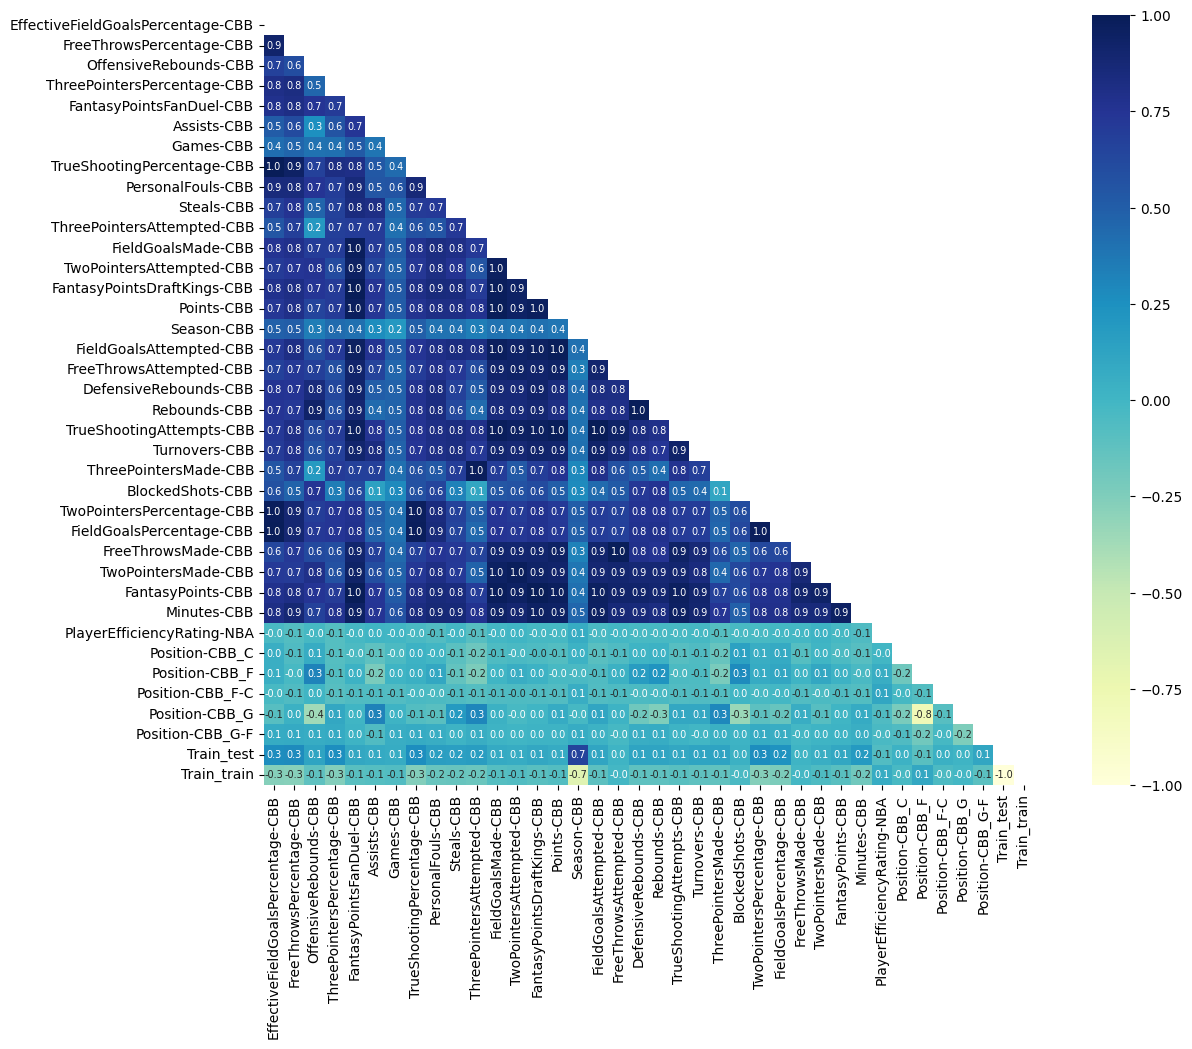

In [ ]:
# Correlation Matrix
import seaborn as sns
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), mask = mask, square = True, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='YlGnBu', annot_kws={"size": 7})  
plt.xticks(rotation=90)  
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EffectiveFieldGoalsPercentage-CBB  472 non-null    float64
 1   FreeThrowsPercentage-CBB           472 non-null    float64
 2   OffensiveRebounds-CBB              472 non-null    float64
 3   ThreePointersPercentage-CBB        472 non-null    float64
 4   FantasyPointsFanDuel-CBB           472 non-null    float64
 5   Assists-CBB                        472 non-null    float64
 6   Games-CBB                          472 non-null    float64
 7   TrueShootingPercentage-CBB         472 non-null    float64
 8   PersonalFouls-CBB                  472 non-null    float64
 9   Steals-CBB                         472 non-null    float64
 10  ThreePointersAttempted-CBB         472 non-null    float64
 11  FieldGoalsMade-CBB                 472 non-null    float64

In [ ]:
X_train = train.drop(['PlayerEfficiencyRating-NBA','Position-CBB'], axis=1)
X_test = test.drop(['PlayerEfficiencyRating-NBA','Position-CBB'], axis=1)
y_train = train['PlayerEfficiencyRating-NBA']
y_test = test['PlayerEfficiencyRating-NBA']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)      # 2. instantiate model
model.fit(X_train, y_train)                      # 3. fit model to data
model.coef_, model.intercept_

(array([-2.86659376e-01, -5.79681114e-02, -6.85951191e-02, -1.77421493e-02,
         2.81808361e-02,  8.81529618e-04,  1.70444286e-01,  1.76378965e-01,
        -3.57477265e-02, -7.71375986e-02,  4.13631364e-01, -8.67474810e-01,
         4.18267839e-01, -3.13581994e-02,  8.61039379e-02,  1.42212592e+00,
         8.81802979e-01,  5.20547175e-01,  3.98341608e-02, -4.05192975e-02,
        -1.30726425e+00,  1.89498836e-02,  5.51640557e-01, -7.37337494e-02,
        -1.04032238e-01,  3.22459692e-01, -6.00698133e-02,  7.16172239e-01,
         2.81808361e-02, -6.97753706e-03]),
 -2859.5104546467687)

In [ ]:
# Variables Selection
y_train_fit = model.predict(X_train)              # 4a. predict on training data
mse_train = np.mean( (y_train - y_train_fit)**2 )
print('MSE Linear Test: ', mse_train)

MSE Linear Test:  87.59524227997407


In [ ]:
# Feature Importances
y_test_fit = model.predict(X_test)                # 4b. predict on test data
mse_test = np.mean( (y_test - y_test_fit)**2 )
print('MSE Linear Test: ', mse_test)

In [ ]:
# Linear Regression using Machine Learning regularization
# LASSO technique

## 4.2 Decision Tree

We found out that the categorical variables worsen the performance of our tree-based models. So, we decided to drop the Positions feature from the dataset.

In [ ]:
X_train = X_train.drop(['Position-CBB'], axis=1)
X_test = X_test.drop(['Position-CBB'], axis=1)

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import *

#### 4.2 a) Build "Full Tree"

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

In [ ]:
y_dt_train = dt.predict(X_train)
y_dt_test = dt.predict(X_test)

In [ ]:
mse_train = mean_squared_error(y_train, y_dt_train)
mse_test = mean_squared_error(y_test, y_dt_test)

print("MSE train: ", mse_train)
print("MSE test: ", mse_test)

In [ ]:
print('Number of nodes', dt.tree_.node_count)

In [ ]:
text_representation = tree.export_text(dt)
print(text_representation)

In [ ]:
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt, feature_names=X_train.columns);

#### 4.2 b) Reduced Tree

In [ ]:
dt_reduced = DecisionTreeRegressor(max_depth=5, 
                                  min_samples_split = 40, 
                                  min_samples_leaf = 100,
                                  min_impurity_decrease = 0.01)
dt_reduced.fit(X_train, y_train)

In [ ]:
y_train_reducedDT = dt_reduced.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_reducedDT)
print('MSE Train: ', mse_train)

In [ ]:
y_test_reducedDT = dt_reduced.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_reducedDT)
print('MSE Test: ', mse_test)

#### 4.2 c) Hyper Parameters Tuning
Grid Search 3-fold Cross Validation

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV
tuning_model = GridSearchCV(dt, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)

In [ ]:
# def timer(start_time=None):
#     if not start_time:
#         start_time=datetime.now()
#         return start_time
#     elif start_time:
#         thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#         tmin,tsec=divmod(temp_sec,60)
#         #print(thour,":",tmin,':',round(tsec,2))
        
# from datetime import datetime

# start_time=timer(None)
# tuning_model.fit(X_train, y_train)
# timer(start_time)

In [ ]:
# tuning_model.best_params_

We commented out since the tuning needs long time to fit all models.  
The best parameter after tuning is:   
> 
             {'max_depth': 3,
              'max_features': 'auto',  
              'max_leaf_nodes': None,  
              'min_samples_leaf': 1,  
              'min_weight_fraction_leaf': 0.3,  
              'splitter': 'random'}. 

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth = 3,
                                         max_features = 'auto',
                                         max_leaf_nodes = None,
                                         min_samples_leaf = 1,
                                         min_weight_fraction_leaf = 0.3,
                                         splitter = 'random')
tuned_hyper_model.fit(X_train,y_train)

In [ ]:
tuned_pred = tuned_hyper_model.predict(X_test)

In [ ]:
# with tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

In [ ]:
# without tuning
print('MAE:', metrics.mean_absolute_error(y_test, y_dt_test))
print('MSE:', metrics.mean_squared_error(y_test, y_dt_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_dt_test)))

## 4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#### 4.3 a) Full Tree

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

In [ ]:
y_rf_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
print(mse_rf)

#### 4.3 b) Reduced Tree

In [ ]:
reduce_rf =  RandomForestRegressor(n_estimators = 300, 
                                   max_features = 'sqrt', 
                                   max_depth = 5, 
                                   random_state = 18)
reduce_rf.fit(X_train, y_train)

In [ ]:
pred_reduced_rf = reduce_rf.predict(X_test)
mse_reducedRF = mean_squared_error(y_test, pred_reduced_rf)
rmse_reducedRF = mse_reducedRF**.5
print("MSE test: ", mse_reducedRF)
print("RMSE: ", rmse_reducedRF)

#### 4.2 c) Hyper Parameters Tuning
Grid Search 5-fold Cross Validation

In [ ]:
# from datetime import datetime
# ## Define Grid 
# grid = { 
#     'n_estimators': [100,200,300,400,500],
#     'max_features': ['sqrt','log2'],
#     'max_depth' : [1,2,3,4,5,6,7,8,9,10],
#     'random_state' : [18]
# }
# ## show start time
# print(datetime.now())
# ## Grid Search function
# CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
# CV_rfr.fit(X_train, y_train)
# ## show end time
# print(datetime.now())

In [ ]:
# CV_rfr.best_params_

We commented out since the tuning needs long time to fit all models.  
The best parameter after tuning is:   
> 
             {'max_depth': 5,  
              'max_features': 'log2',  
              'n_estimators': 100,  
              'random_state': 18} 

In [ ]:
rf_tuning = RandomForestRegressor(n_estimators = 100, 
                                  max_features = 'log2', 
                                  max_depth = 5, 
                                  random_state = 18)
rf_tuning.fit(X_train, y_train)

pred_tuning = rf_tuning.predict(X_test)
mse_tuning = mean_squared_error(y_test, pred_tuning)

print("MSE validation: ", mse_tuning)
print("RMSE: ", mse_tuning**.5)

## 4.4 K-NN

In [ ]:
#import packages
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#tuning k
#step 1: set largest k to be n where n=number of rows in training set
X_test.shape

In [ ]:
#tuning k step 2 with GridSearchCV 
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
k_range = list(range(1, X_test.shape[0]))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
#get tuned k
print(grid_search.best_params_)


In [ ]:
#fit regressor with tuned k value
knn = KNeighborsRegressor(n_neighbors=34) #see above cell

knn.fit(X_train, y_train)

y_train_hat=knn.predict(X_train) 

mse_train = mean_squared_error(y_train_hat, y_train)
mse_train

In [ ]:
#predict on test set and get mse
y_test_hat = knn.predict(X_test)

mse_test = mean_squared_error(y_test_hat, y_test)
mse_test

# 5. Ensemble Method: Boosting

## 5.1 XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

#### 5.1 a) Basic Model

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = mse_xgb**.5
print("MSE Test: ", mse_xgb)
print("RMSE: ", rmse_xgb)

#### 5.1 b) Hyper Parameters Tuning
Randomized Search 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'n_estimators': [100, 500, 1000],
    'max_depth': range(3, 10, 2),
    'subsample': np.arange(0.5, 1, 0.1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Instantiate XGBoost regressor
xgb_tuning = XGBRegressor()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_tuning,
    param_distributions=param_grid,
    n_iter=50,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV object to data
random_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", abs(random_search.best_score_))

## 5.2 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#### 5.2 a) Basic Model

In [ ]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)
mse_gbm = mean_squared_error(y_test, pred_gbm)
rmse_gbm = mse_gbm**.5
print("MSE test: ", mse_gbm)
print("RMSE: ", rmse_gbm)

#### 5.2 b) Reduced Model

In [ ]:
gbm_reduced = GradientBoostingRegressor(
    n_estimators=20, 
    learning_rate=0.1, 
    max_depth=1 )
gbm_reduced.fit(X_train, y_train)
pred_gbm_reduced = gbm_reduced.predict(X_test)
mse_gbm_reduced = mean_squared_error(y_test, pred_gbm_reduced)
rmse_gbm_reduced = mse_gbm_reduced**.5
print("MSE Test: ", mse_gbm_reduced)
print("RMSE: ", rmse_gbm_reduced)

#### 5.2 c) Hyper Parameters Tuning
Randomized Search 5-fold Cross Validation

In [ ]:
param_grid = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'n_estimators': [100, 500, 1000],
    'max_depth': range(3, 10, 2),
    'subsample': np.arange(0.5, 1, 0.1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Instantiate Gradient Boosting regressor
gbm = GradientBoostingRegressor()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gbm,
    param_distributions=param_grid,
    n_iter=50,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV object to data
random_search.fit(X_train, y_train)

In [ ]:
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", abs(random_search.best_score_))